In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
low_encoder_df = pd.read_pickle("/work/aistwal/MMDS_MasterThesis/data/encoder_data/low_conv_autoencoder_200_50.pkl")

In [3]:
low_encoder_df

,Label,Encoder Output
0,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
1,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
2,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
3,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
4,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
...,...,...
2995,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ..."
2996,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ..."
2997,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ..."
2998,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ..."


In [4]:
print(type(low_encoder_df['Encoder Output'][0]))
low_encoder_df['Encoder Output'][0].size

<class 'numpy.ndarray'>


120320

In [5]:
# Convert list of arrays into a 2D numpy array where each array becomes a row
data = np.stack(low_encoder_df['Encoder Output'].values)

In [6]:
#Implement kmeans clustering
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=10, random_state=42).fit(data)

In [8]:
# Get the cluster labels for each instance
cluster_labels = kmeans.labels_

# Add these labels back to your DataFrame
low_encoder_df['Cluster'] = cluster_labels

In [10]:
np.unique(low_encoder_df["Label"])

array(['bus', 'busystreet', 'office', 'openairmarket', 'park',
       'quietstreet', 'restaurant', 'supermarket', 'tube', 'tubestation'],
      dtype=object)

In [12]:
print(low_encoder_df.head())

  Label                                     Encoder Output  Cluster
0   bus  [47.757042, 41.060787, 47.57038, 45.60024, 32....        2
1   bus  [47.757042, 41.060787, 47.57038, 45.60024, 32....        2
2   bus  [47.757042, 41.060787, 47.57038, 45.60024, 32....        8
3   bus  [47.757042, 41.060787, 47.57038, 45.60024, 32....        2
4   bus  [47.757042, 41.060787, 47.57038, 45.60024, 32....        2


In [13]:
low_encoder_df.groupby(['Label']).count()

# 300 examples in each scene

,Encoder Output,Cluster
Label,,
bus,300,300
busystreet,300,300
office,300,300
openairmarket,300,300
park,300,300
quietstreet,300,300
restaurant,300,300
supermarket,300,300
tube,300,300


In [14]:
#plot
import seaborn as sns

def create_plot(cluster_df, scene):
    plt.figure(figsize = (10,6))
    barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')
    plt.title(f'Cluster Distribution for Class Label {scene}')
    plt.xlabel('Cluster Label')
    plt.ylabel('Frequency')
    
    # Adding text labels for each bar
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),  # format the count to one decimal place
                         (p.get_x() + p.get_width() / 2., p.get_height()),  # position for the text
                         ha = 'center',  # center the text horizontally
                         va = 'center',  # center the text vertically within the bar
                         xytext = (0, 9),  # distance from the top of the bar to the text
                         textcoords = 'offset points')
    plt.show()



/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


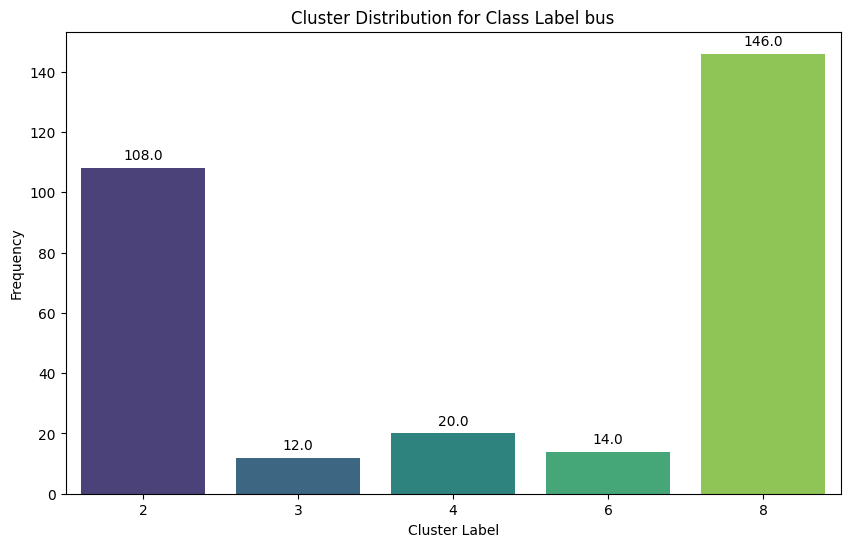

/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


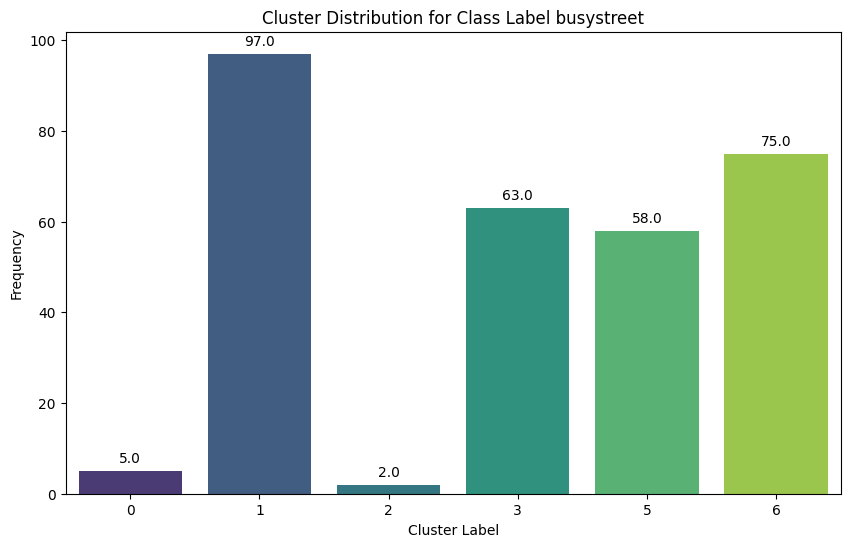

/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


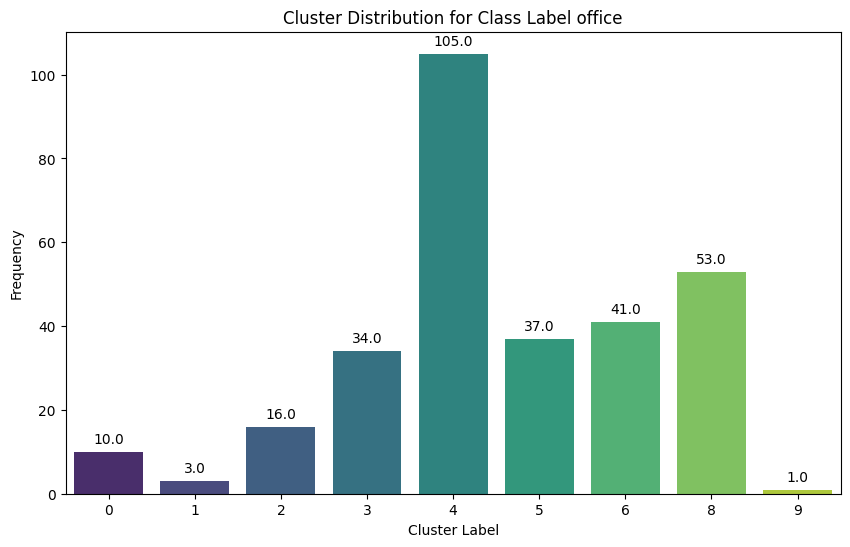

/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


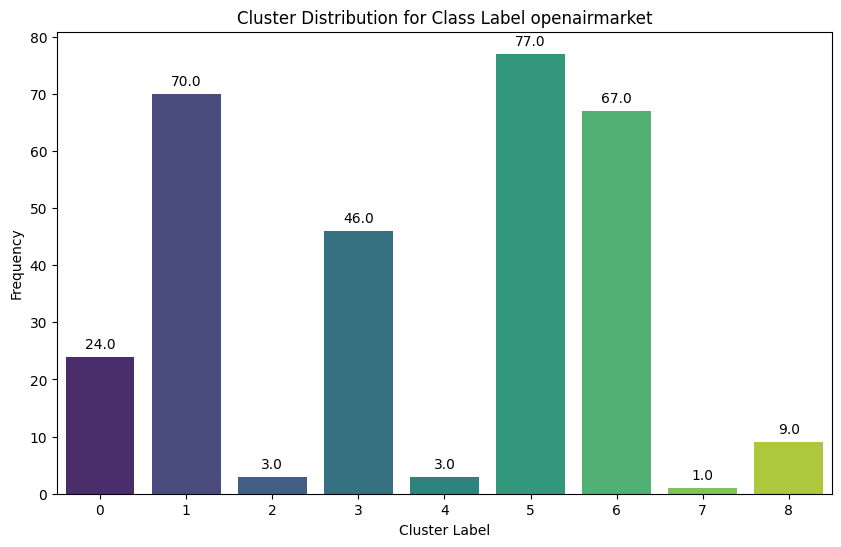

/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


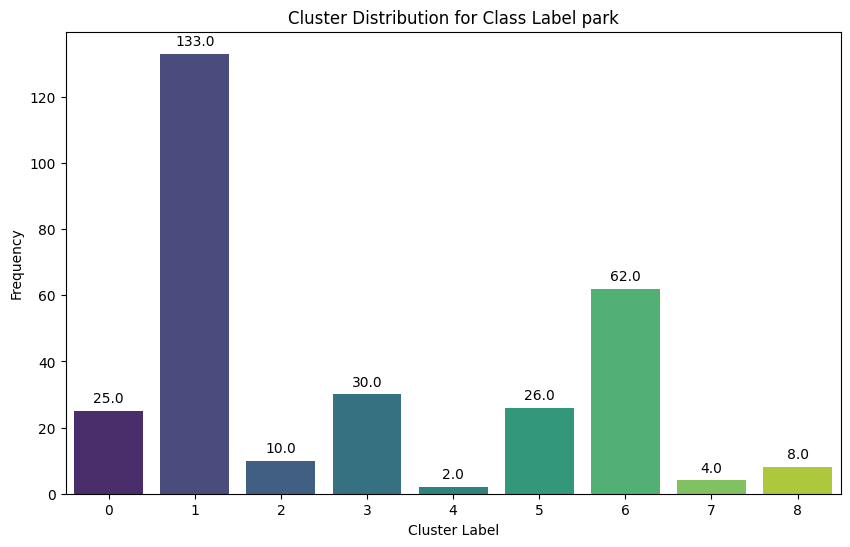

/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


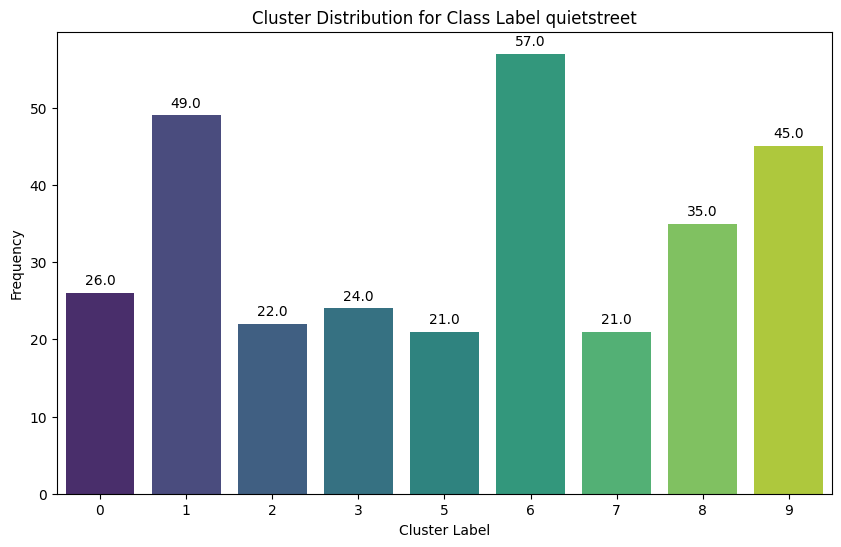

/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


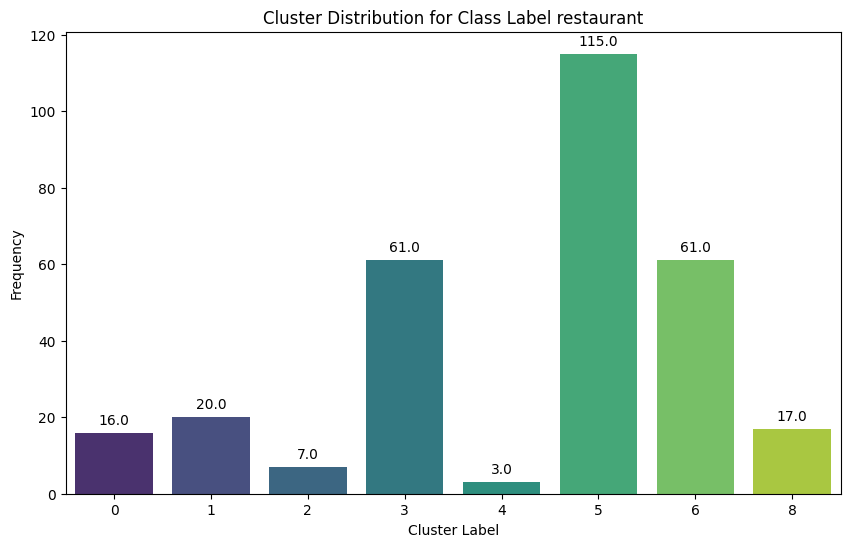

/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


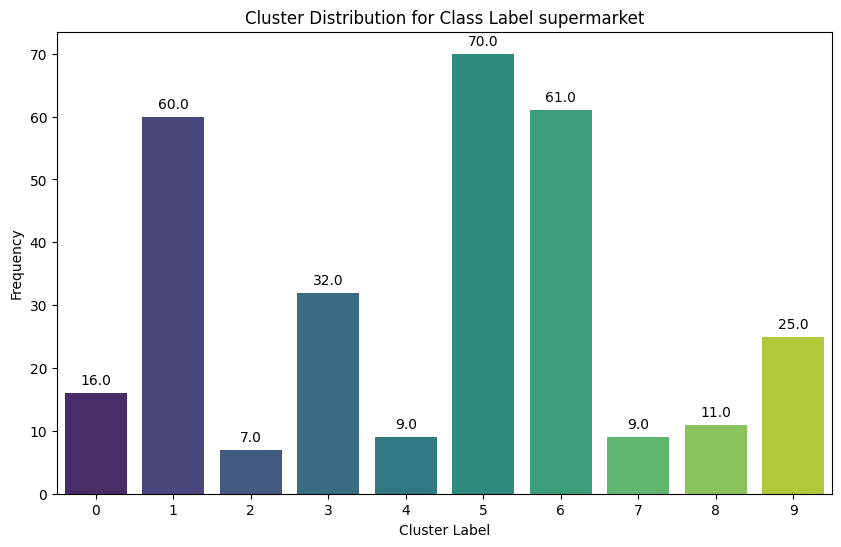

/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


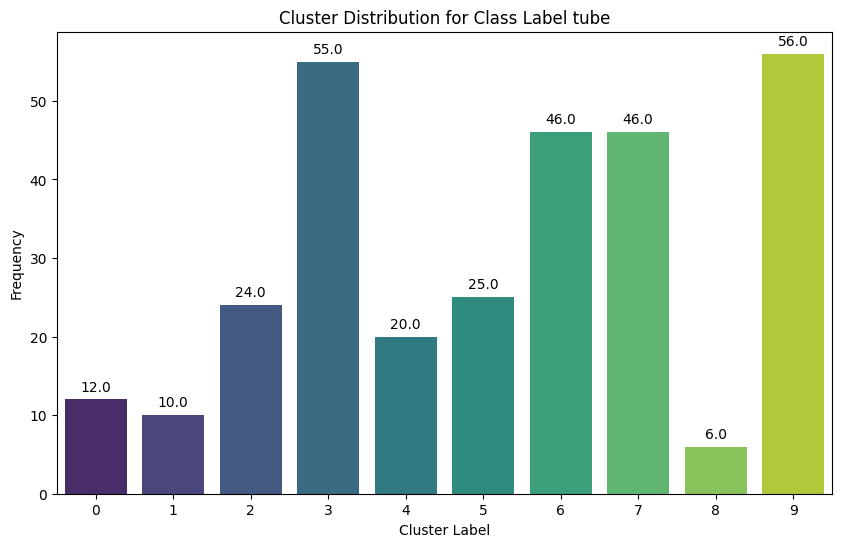

/tmp/ipykernel_3208512/2054764212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Cluster', y='Count', data = cluster_df, palette='viridis')


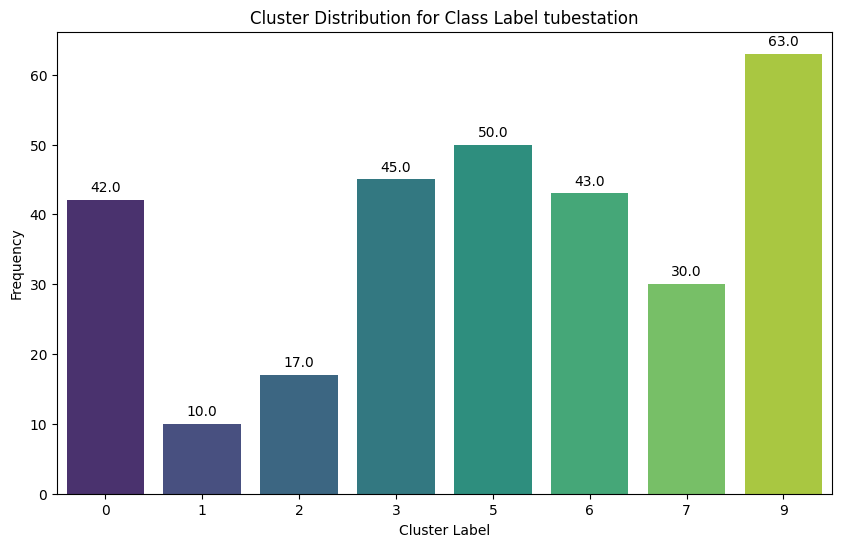

In [16]:
scenes = np.unique(low_encoder_df["Label"])


for scene in scenes:
    # Create a scene specific df
    cluster = low_encoder_df[low_encoder_df['Label'] == scene]['Cluster'].value_counts()
    # Convert the Series to DataFrame for easier plotting
    cluster_df = cluster.reset_index()
    cluster_df.columns = ['Cluster', 'Count']

    # Plot this frame
    create_plot(cluster_df, scene)

In [13]:
## Can we use acoustic event information to better separate and identify the scenes?
## All the scenes are kind of getting mixed.

## PCA ANALYSIS

In [17]:
## TRY PCA and compare the results with kmeans clustering 
low_encoder_df

,Label,Encoder Output,Cluster
0,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32....",2
1,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32....",2
2,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32....",8
3,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32....",2
4,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32....",2
...,...,...,...
2995,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ...",5
2996,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ...",5
2997,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ...",5
2998,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ...",5


In [18]:
# Assuming encoder_df['Encoder Output'] contains the numpy arrays
data_matrix = np.stack(low_encoder_df['Encoder Output'].values)
print("Data Shape:", data_matrix.shape)

Data Shape: (3000, 120320)


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to two dimensions
principal_components = pca.fit_transform(data_matrix)
# print(principal_components.shape)  #3000,3


# Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Add the category labels from the original DataFrame
pca_df['Label'] = low_encoder_df['Label']

In [34]:
# import seaborn as sns

# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', hue='Label', data=pca_df, palette='viridis', s=100, alpha=0.6)
# plt.title('PCA of Encoded Outputs')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.zlabel('Principal Component 2')
# plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc=2)
# plt.grid(True)
# plt.show()

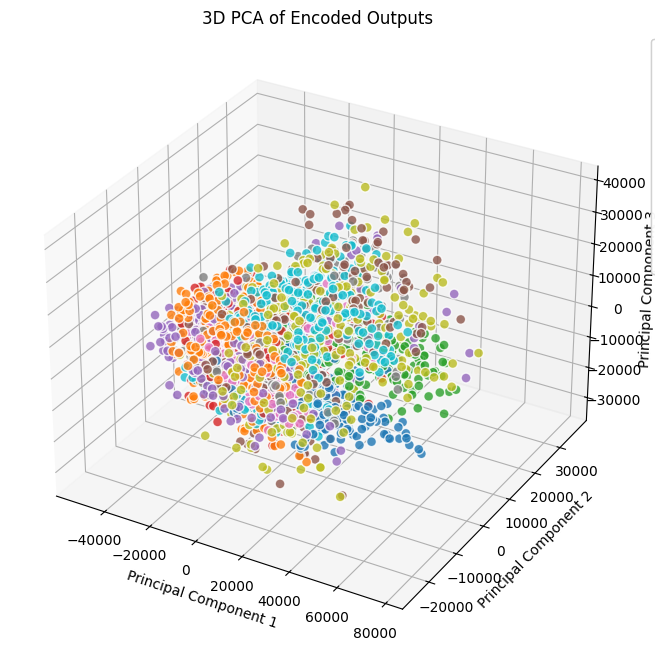

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['Principal Component 1'],
                     pca_df['Principal Component 2'],
                     pca_df['Principal Component 3'],
                     c=pd.Categorical(pca_df['Label']).codes,
                     cmap='tab10',
                     s=50, alpha=0.8, edgecolors='w', linewidth=1)

# Adding labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Encoded Outputs')

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Labels", loc='upper right', bbox_to_anchor=(1.15, 1))
ax.add_artist(legend)

plt.show()